In [1]:
import matplotlib.pyplot as plt
import numpy as np

# The following ensures that the modules present in the project directory are available
# to the notebook
import project_path  # noqa: F401
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from lib.dataset import TrainDataset

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# The directory with the unzipped contents of histopathologic-cancer-detection.zip
DATA_DIR = "../data"
RANDOM_STATE = 42  # A seed to make random results reproducible

Seeding random behavior in `numpy` so that results are reproducible.

In [2]:
np.random.seed(RANDOM_STATE)

The labels dataframe from the competition CSV contains the image "id" along with the "label" representing negative as 0 and positive as 1.

In [3]:
train_dataset = TrainDataset(DATA_DIR)
train_labels_df = train_dataset.read_csv()
train_labels_df.head()

,label
id,
f38a6374c348f90b587e046aac6079959adf3835,0
c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
755db6279dae599ebb4d39a9123cce439965282d,0
bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
068aba587a4950175d04c680d38943fd488d6a9d,0


There is class imbalance present in the data with the positive class being the minority.

In [4]:
train_labels_df["label"].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [5]:
train_images, train_labels = train_dataset.read_images_and_labels(train_labels_df)

Plotting both negative and positive pathology scans.

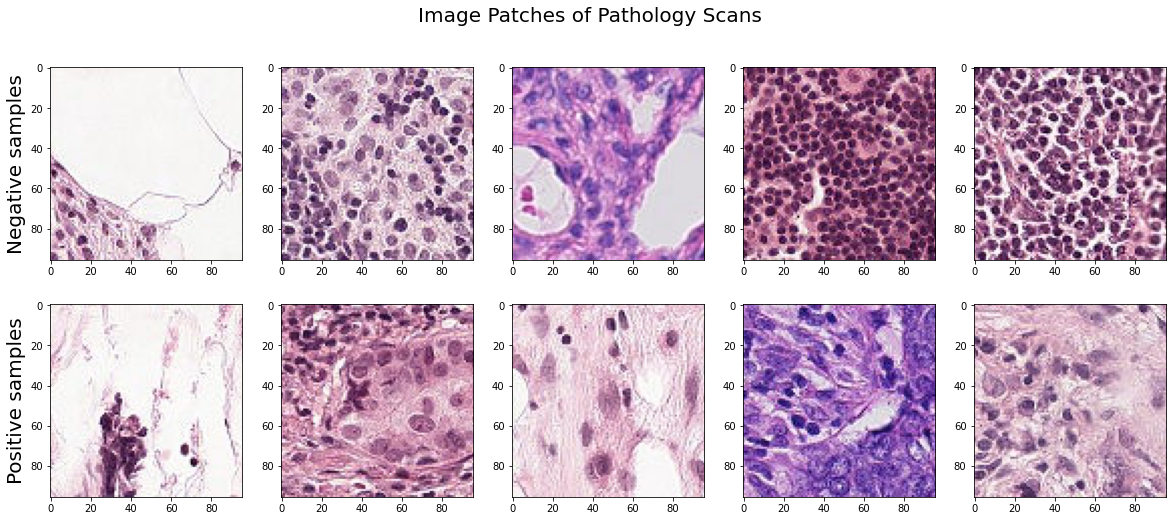

In [ ]:
"""
These image plots are recreated from the following Kaggle submission:
https://www.kaggle.com/qitvision/a-complete-ml-pipeline-fast-ai
"""

fig, ax = plt.subplots(2, 5, figsize=(20, 8))


def first_five_images_with_label(label):
    return train_images[np.where(train_labels == label)][:5]


for plot_idx, image in enumerate(first_five_images_with_label(0)):
    ax[0, plot_idx].imshow(image)

for plot_idx, image in enumerate(first_five_images_with_label(1)):
    ax[1, plot_idx].imshow(image)

fig.suptitle("Image Patches of Pathology Scans", fontsize=20)
ax[0, 0].set_ylabel("Negative samples", fontsize=20)
_ = ax[1, 0].set_ylabel("Positive samples", fontsize=20)

In [ ]:
X = train_images.reshape(train_images.shape[0], -1).copy()
X = X / 255  # Standardize the dataset
y = train_labels.copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [ ]:
model = LogisticRegression(tol=0.1, random_state=RANDOM_STATE, verbose=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
classification_report(y_test, y_pred)